In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from lib import load_curvecurator, plot_fit_type, plot_fit, fit, to_p_space, from_p_space

In [2]:
palette = sns.color_palette("tab10")
palette = {
    "Target": palette[0],
    "Off-target": palette[1],
    "Both": palette[2],
}

In [3]:
drugs = {
    "Afatinib": {
        'identifier': "10184653/2reps_only",
        'target_ec50_nm': 3,
    },
    "Lapatinib": {
        "identifier": "208908",
        "target_ec50_nm": 65,
    },
    "PF-3758309": {
        "identifier": "25227462",
        'target_ec50_nm': 3,
    },
    "Dasatinib": {
        "identifier": "3062316",
        'target_ec50_nm': 5,
    },
    "92131101": {
        "identifier": "92131101",
        'target_ec50_nm': 10,
    },
    "Tipifarnib": {
        "identifier": "159324",
        'target_ec50_nm': 40,
    },
    "Docetaxel": {
        "identifier": "9877265",
        'target_ec50_nm': 50,
    },
    "168312962": {
        "identifier": "168312962",
        'target_ec50_nm': 40,
    },
    "Selumetinib": {
        "identifier": "10127622",
        'target_ec50_nm': 200,
    },
    "11364421": {
        "identifier": "11364421",
        'target_ec50_nm': 8,
    },
    "Bleomycin": {
        "identifier": "46930982",
        'target_ec50_nm': 50,
    },
    "Alisertib": {
        "identifier": "24771867",
        'target_ec50_nm': 30,
    },
    "Oligomycin A": {
        "identifier": "6364620",
        'target_ec50_nm': 30,
    },
    "Trametinib": {
        "identifier": "11707110",
        'target_ec50_nm': 20,
    },
    "Leptomycin B": {
        "identifier": "6917907",
        'target_ec50_nm': 30,
    },
    "Vincristine": {
        "identifier": "5388993",
        'target_ec50_nm': 100,
    },
    "Idelalisib": {
        "identifier": "11625818",
        'target_ec50_nm': 80,
    },
    "Rapamycin": {
        "identifier": "5284616",
        'target_ec50_nm': 30,
    },
}

drug = "Afatinib"

df_curvecurator, df_doses = load_curvecurator(drugs[drug]['identifier'])
target_pec50 = to_p_space(drugs[drug]['target_ec50_nm'] / 1e9)
target_pec50_range = np.array([target_pec50 - 0.5, target_pec50 + 0.5])
target_ec50_range = from_p_space(target_pec50_range)

Text(0.5, 1.0, 'Afatinib')

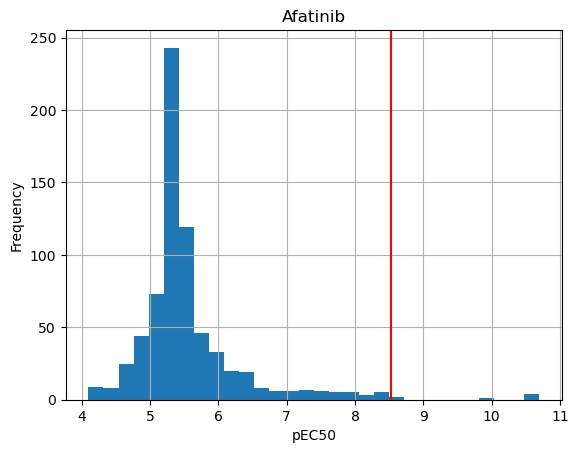

In [4]:
df_curvecurator["pEC50"].hist(bins=30)
plt.axvline(target_pec50, color="red")
# Set x-axis label
plt.xlabel("pEC50")
# Set y-axis label
plt.ylabel("Frequency")
plt.title(drug)

In [5]:
df_curvecurator = fit(df_curvecurator, df_doses, target_pec50_range)

<Axes: xlabel='sigmoid_diff', ylabel='Count'>

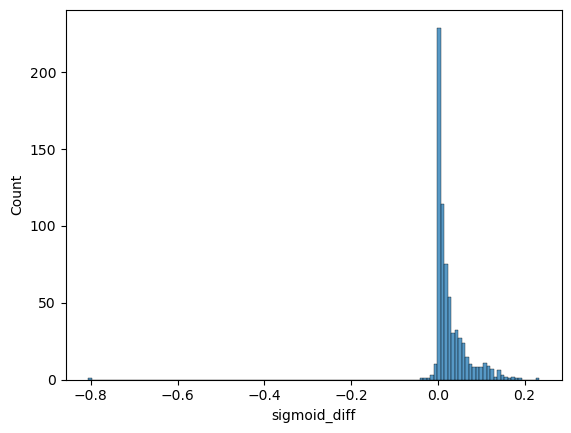

In [6]:
sns.histplot(df_curvecurator, x="sigmoid_diff")

<Axes: xlabel='double_global_effect_size', ylabel='Count'>

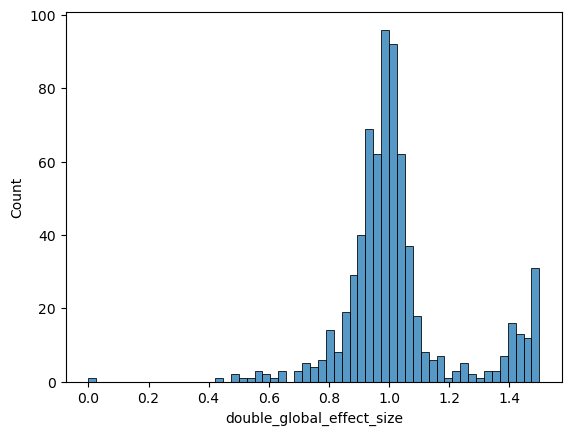

In [7]:
sns.histplot(df_curvecurator, x="double_global_effect_size")

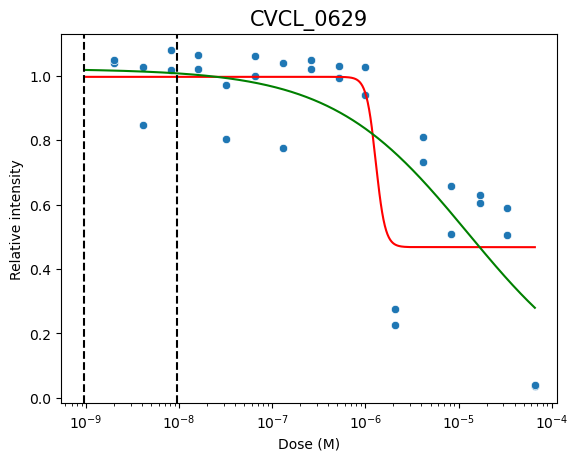

In [8]:
df_increasing_sigdiff = df_curvecurator[df_curvecurator["sigmoid_diff"] < 0.0].sort_values("sigmoid_diff", ascending=False)
plot_fit(df_curvecurator, df_doses, df_increasing_sigdiff.index[-3], target_ec50_range)

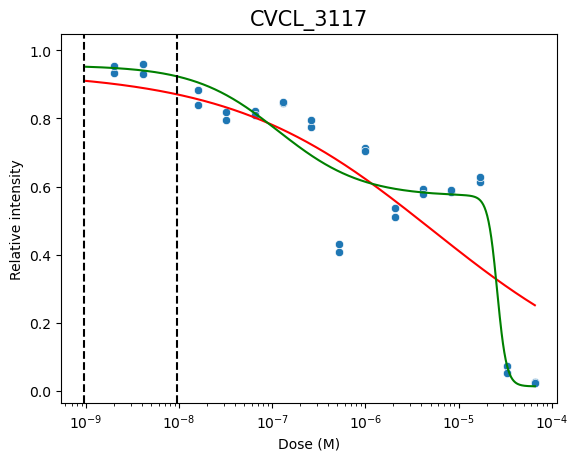

In [9]:
plot_fit(df_curvecurator, df_doses, "CVCL_3117", target_ec50_range)

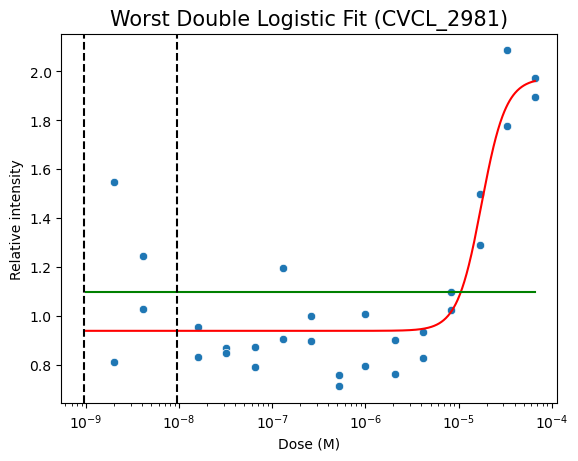

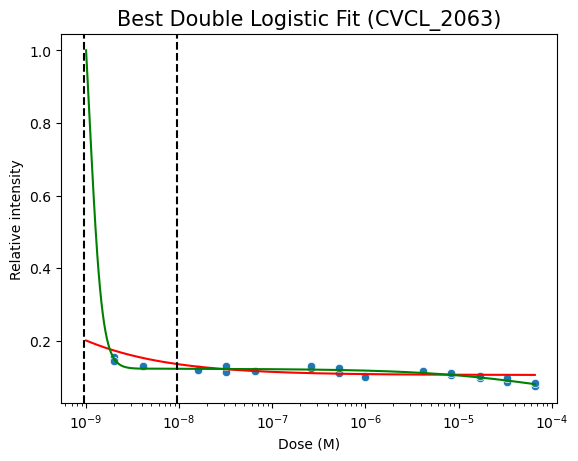

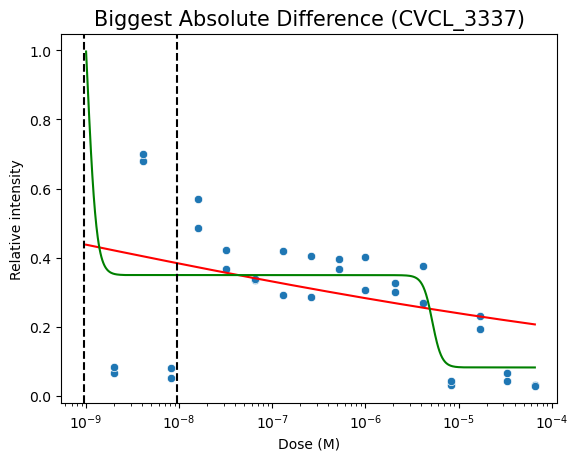

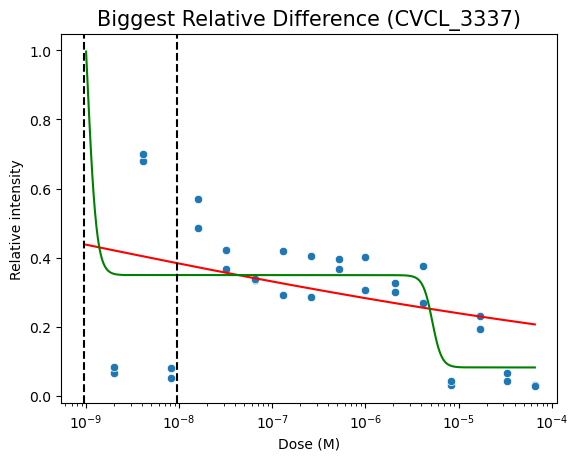

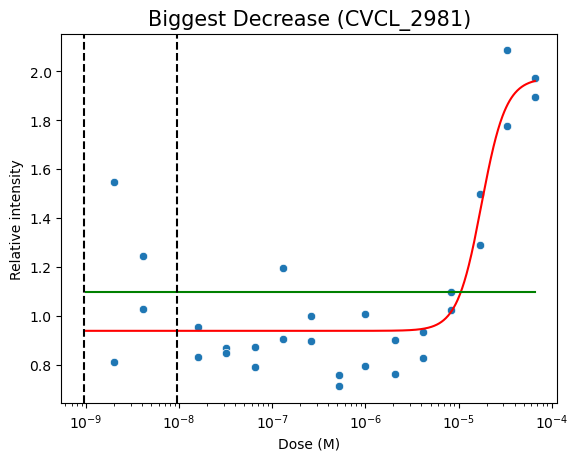

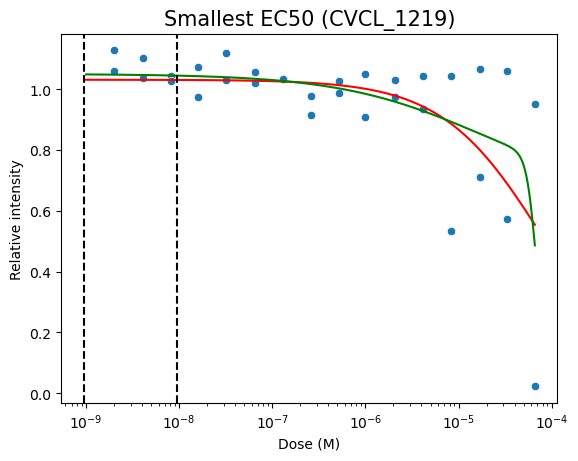

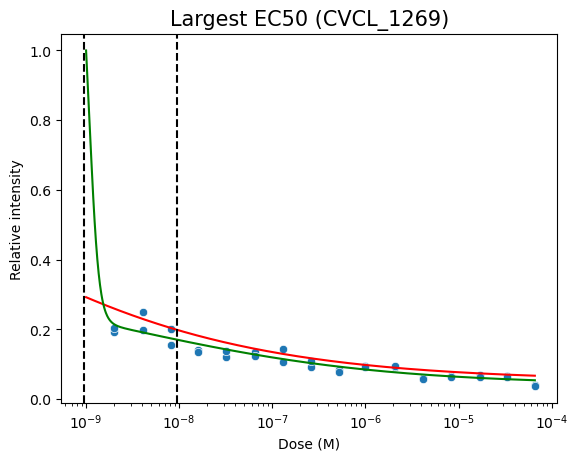

In [10]:
worst_single = df_curvecurator["single_r2"].idxmin()
best_single = df_curvecurator["single_r2"].idxmax()
worst_double = df_curvecurator["double_r2"].idxmin()
best_double = df_curvecurator["double_r2"].idxmax()
largest_diff_abs = df_curvecurator["sigmoid_diff"].idxmax()
largest_dec_abs = df_curvecurator["sigmoid_diff"].idxmin()
smallest_ec50 = df_curvecurator["pEC50"].idxmin()
largest_ec50 = df_curvecurator["pEC50"].idxmax()
largest_diff_rel = (df_curvecurator["sigmoid_diff"] / df_curvecurator["single_r2"]).idxmax()

plot_fit(df_curvecurator, df_doses, worst_double, target_ec50_range, title=f'Worst Double Logistic Fit ({worst_double})')
plot_fit(df_curvecurator, df_doses, best_double, target_ec50_range, title=f'Best Double Logistic Fit ({best_double})')
plot_fit(df_curvecurator, df_doses, largest_diff_abs, target_ec50_range, title=f'Biggest Absolute Difference ({largest_diff_abs})')
plot_fit(df_curvecurator, df_doses, largest_diff_rel, target_ec50_range, title=f'Biggest Relative Difference ({largest_diff_rel})')
plot_fit(df_curvecurator, df_doses, largest_dec_abs, target_ec50_range, title=f'Biggest Decrease ({largest_dec_abs})')
plot_fit(df_curvecurator, df_doses, smallest_ec50, target_ec50_range, title=f'Smallest EC50 ({smallest_ec50})')
plot_fit(df_curvecurator, df_doses, largest_ec50, target_ec50_range, title=f'Largest EC50 ({largest_ec50})')

In [11]:
#https://stackoverflow.com/a/71515035/2901002
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}% ({v:d})'.format(pct, v=val)
        return my_format

In [12]:
df_curvecurator["Double fit type"].value_counts().to_dict()

{'Off-target': 568, 'Both': 129}

Text(0.5, 0.98, 'Afatinib')

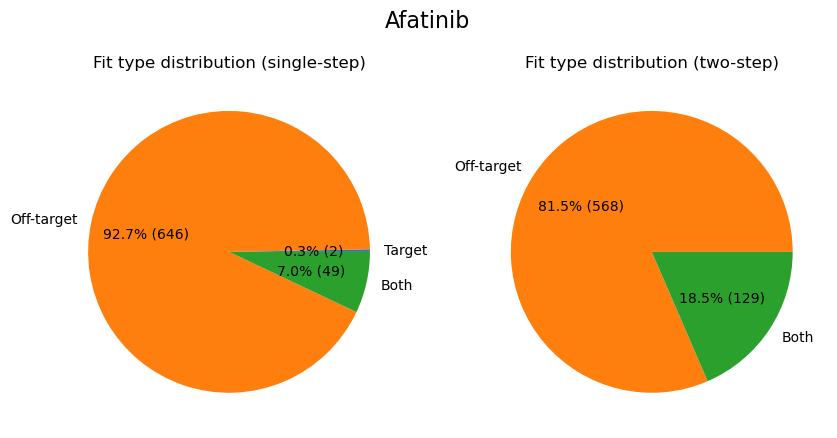

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

cols = ["Target", "Off-target", "Both"]

counts = df_curvecurator["Single fit type"].value_counts()
counts = counts.loc[[col for col in cols if col in counts.index]]
counts.plot.pie(autopct=autopct_format(counts), title="Fit type distribution (single-step)", ax=axs[0], colors=[palette[col] for col in counts.index])

# Show absolute values
counts = df_curvecurator["Double fit type"].value_counts()
counts = counts.loc[[col for col in cols if col in counts.index]]
counts.plot.pie(autopct=autopct_format(counts), title="Fit type distribution (two-step)", ax=axs[1], colors=[palette[col] for col in counts.index])

for ax in axs:
    # Remove y-axis label
    ax.set_ylabel('')

# Set global title
plt.suptitle(drug, fontsize=16)

<Axes: xlabel='pEC50', ylabel='Count'>

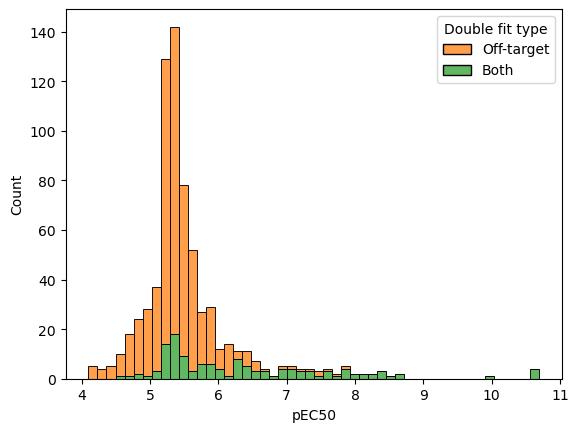

In [14]:
sns.histplot(df_curvecurator, x="pEC50", hue="Double fit type", bins=50, multiple="stack", palette=palette)

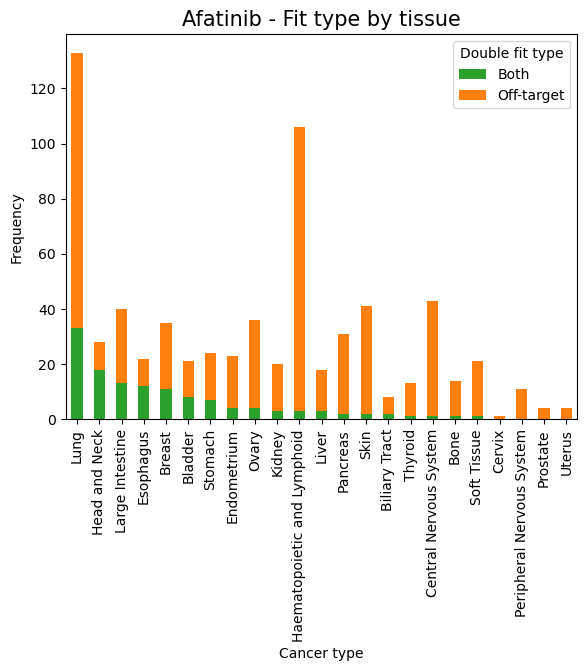

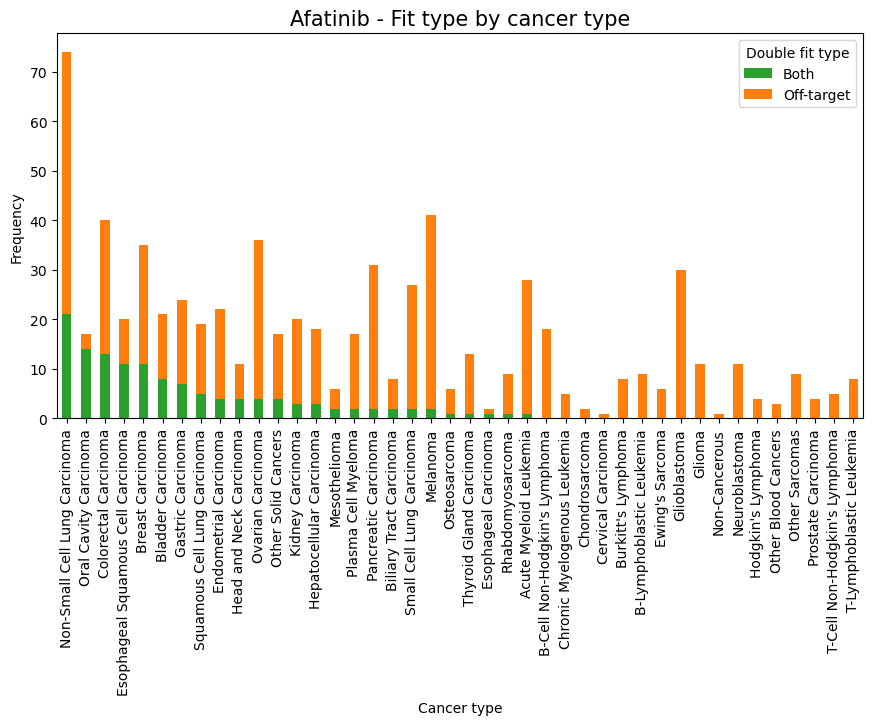

In [15]:
for category in ["tissue", "cancer_type"]:
    plot_fit_type(df_curvecurator, category, drug, palette)

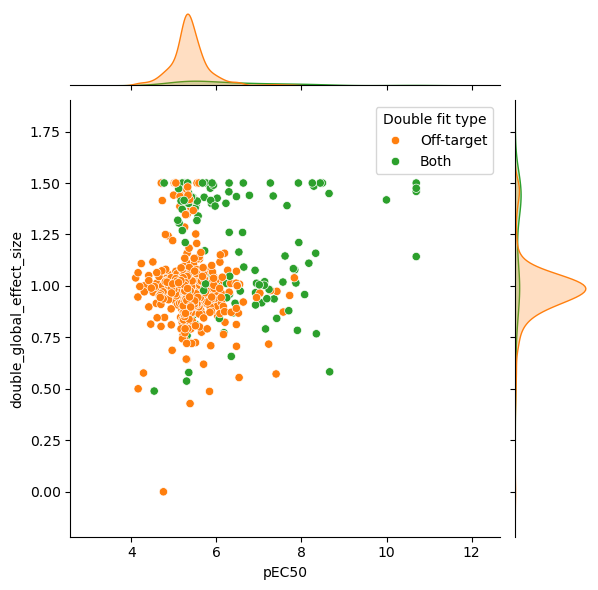

In [26]:
sns.jointplot(data=df_curvecurator, x="pEC50", y="double_global_effect_size", hue="Double fit type", palette=palette)

# Comparison with another drug

In [16]:
other_drug = "Lapatinib"
df_curvecurator_other, df_doses_other = load_curvecurator(drugs[other_drug]['identifier'])
target_pec50_other = to_p_space(drugs[other_drug]['target_ec50_nm'] / 1e9)
target_pec50_range_other = np.array([target_pec50_other - 0.5, target_pec50_other + 0.5])
target_ec50_range_other = from_p_space(target_pec50_range_other)

df_curvecurator_other = fit(df_curvecurator_other, df_doses_other, target_pec50_range_other)

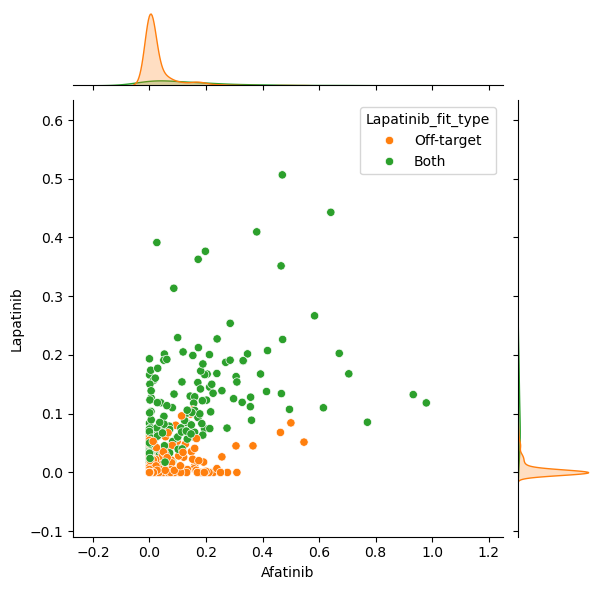

In [24]:
cl_intersection = list(set(df_curvecurator.index).intersection(set(df_curvecurator_other.index)))
column = "double_target_effect_size"

df_intersection = pd.DataFrame({
    drug: df_curvecurator.loc[cl_intersection, column],
    f"{drug}_fit_type": df_curvecurator.loc[cl_intersection, "Double fit type"],
    other_drug: df_curvecurator_other.loc[cl_intersection, column],
    f"{other_drug}_fit_type": df_curvecurator_other.loc[cl_intersection, "Double fit type"],
})

sns.jointplot(data=df_intersection, x=drug, y=other_drug, hue=f"{other_drug}_fit_type", palette=palette)